In [1]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

sys.path.append("..")
import src

primary, accent = src.theme.set()
pal = sns.color_palette("wfondrie")

def save(fname):
    """Save the figures"""
    figures = Path("figures")
    figures.mkdir(exist_ok=True)
    if not fname.startswith("01_"):
        fname = "05_" + fname
        
    if not fname.endswith(".png"):
        fname += ".png"
    
    plt.tight_layout(pad=0.2)
    plt.savefig(figures / fname, dpi=300)

    
def label(ax=None):
    """Add labels to the plot"""
    if ax is None:
        ax = plt.gca()
        
    ax.set_xlabel("GRAVY Score")
    ax.set_ylabel("Retention Time (min)")


## binary classification

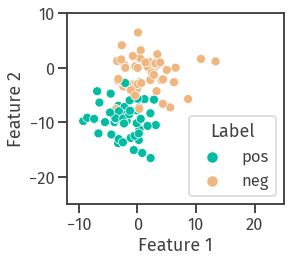

In [2]:
plt.figure(figsize=(3.9, 3.5))
X, y = datasets.make_blobs(
    n_features=2, 
    centers=2,
    random_state=2,
    cluster_std=3,
)

y = pd.Series(y).replace({0: "pos", 1:"neg"})

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.xlim(-12, 25)
plt.ylim(-25, 10)
plt.legend(title="Label", frameon=True)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
save("binary-ex")

## Example data

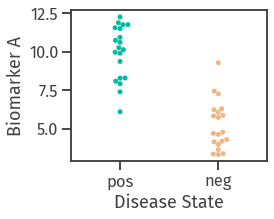

In [3]:
plt.figure(figsize=(3.67, 2.9))
rng = np.random.default_rng(42)
pos = pd.DataFrame({
    "val": rng.normal(10, 2, 20),
    "class": "pos",
    "label": 1,
})
    
neg = pd.DataFrame({
    "val": rng.normal(5, 2, 20),
    "class": "neg",
    "label": 0,
})   

biomarker = pd.concat([pos, neg])

sns.swarmplot(data=biomarker, x="class", y="val")
plt.xlabel("Disease State")
plt.ylabel("Biomarker A")
save("biomarker")

model = LogisticRegression().fit(biomarker["val"].to_numpy()[:, None], biomarker["label"])

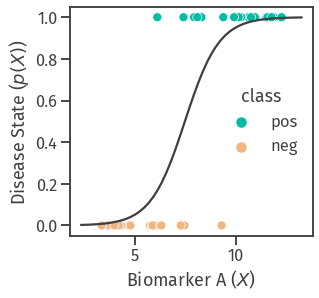

In [4]:
X = np.linspace(biomarker["val"].min() - 1, biomarker["val"].max() + 1)
y = model.predict_proba(X[:, None])[:, 1]

plt.figure(figsize=(4.3, 4))
plt.plot(X, y, color=primary)
sns.scatterplot(data=biomarker, x="val", y="label", hue="class")
plt.xlabel("Biomarker A ($X$)")
plt.ylabel("Disease State ($p(X)$)")
save("lr-model")

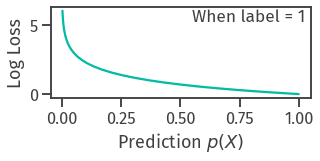

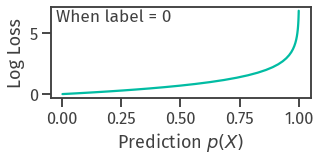

In [5]:
def logloss(px, y):
    return -(y*np.log(px) + (1-y)*np.log(1-px))

lpos = logloss(y, 1)
lneg = logloss(y, 0)

plt.figure(figsize=(4.5,2.1))
plt.plot(y, lpos)
plt.xlabel("Prediction $p(X)$")
plt.ylabel("Log Loss")
plt.annotate(
    "When label = 1", 
    (.98, .98), 
    xycoords="axes fraction",
    ha="right", 
    va="top",
    fontsize="xx-large",
)
save("logloss_1")

plt.figure(figsize=(4.5,2.1))
plt.plot(y, lneg)
plt.xlabel("Prediction $p(X)$")
plt.ylabel("Log Loss")
plt.annotate(
    "When label = 0", 
    (.02, .98), 
    xycoords="axes fraction",
    ha="left", 
    va="top",
    fontsize="xx-large",
)
save("logloss_2")

<Figure size 432x288 with 0 Axes>

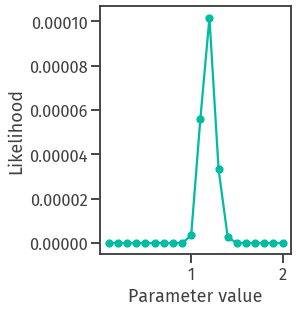

In [6]:
coefs = np.linspace(0.1, 2, 20)
b = model.intercept_
X = np.linspace(biomarker["val"].min() - 1, biomarker["val"].max() + 1)

def predict(x, coef, b):
    return np.exp(coef*x + b) / (1 + np.exp(coef*x + b))


plt.figure()
mle = []
lines = []
for coef in coefs:
    labs = biomarker["label"]
    probs = predict(biomarker["val"].to_numpy(), coef, b)
    a = (labs - 1)**2
    cls_probs = np.abs(a - probs)
    mle.append(np.prod(cls_probs))


plt.figure(figsize=(4, 4.2))
sns.scatterplot(x=coefs, y=mle)
sns.lineplot(x=coefs, y=mle)
plt.xlabel("Parameter value")
plt.ylabel("Likelihood")
save("mle")
    

In [7]:

X, y = datasets.make_classification(
    n_samples=100, 
    n_features=20,
    n_informative=2, 
    n_redundant=2, 
    n_repeated=0, 
    n_classes=2, 
    n_clusters_per_class=1,
    random_state=42
)

std = LogisticRegression(penalty="none").fit(X, y).coef_[0]
l1 = LogisticRegression(penalty="l1", C=0.1, solver).fit(X, y).coef_[0]

sns.barplot(x=np.arange(len(std)), y=std)

SyntaxError: positional argument follows keyword argument (4090468621.py, line 13)